In [2]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

# LOADING THE DATASET

In [4]:
data = pd.read_csv('train.csv')
data = data.drop('0',axis=1)
data.head()

,a,252,255,251,255.1,247,236,255.2,247.1,193,...,241.6,255.186,245.20,253.17,253.18,247.21,255.187,255.188,255.189,255.190
0,a,243,255,255,242,243,255,245,192,138,...,255,255,255,253,252,251,255,255,255,255
1,a,243,247,251,255,236,255,255,243,252,...,255,252,249,249,248,250,255,255,255,255
2,a,251,245,252,255,244,221,165,98,21,...,255,255,255,255,255,255,255,255,255,255
3,a,247,255,246,245,255,254,236,182,55,...,229,255,251,253,255,255,255,255,255,255
4,a,255,242,255,237,158,84,48,73,150,...,232,117,181,251,253,255,255,255,255,255


In [6]:
data

,a,252,255,251,255.1,247,236,255.2,247.1,193,...,241.6,255.186,245.20,253.17,253.18,247.21,255.187,255.188,255.189,255.190
0,a,243,255,255,242,243,255,245,192,138,...,255,255,255,253,252,251,255,255,255,255
1,a,243,247,251,255,236,255,255,243,252,...,255,252,249,249,248,250,255,255,255,255
2,a,251,245,252,255,244,221,165,98,21,...,255,255,255,255,255,255,255,255,255,255
3,a,247,255,246,245,255,254,236,182,55,...,229,255,251,253,255,255,255,255,255,255
4,a,255,242,255,237,158,84,48,73,150,...,232,117,181,251,253,255,255,255,255,255
5,a,253,239,255,255,240,255,247,234,178,...,252,176,225,255,255,247,255,255,255,255
6,a,254,255,247,255,245,242,255,220,176,...,255,255,254,253,255,254,255,255,255,255
7,a,251,255,255,252,254,251,249,254,226,...,255,255,255,255,255,255,255,255,255,255
8,a,255,248,255,240,255,242,197,139,43,...,255,255,254,252,253,254,255,255,255,255
9,a,243,255,255,245,253,255,212,154,97,...,247,255,254,254,255,253,255,255,255,255


# EXPLORATORY ANALYSIS

In [8]:
def convert(y):
    for i in range(len(y)):
        if type(y[i]) is int:
            y[i]=str(y[i])
    z = dict(Counter(list(y)))
    labels = z.keys()
    frequencies = [z[i] for i in labels]
    plt.figure(figsize = (20, 10)) #figure size is in inches 
    plt.bar(labels, frequencies)
    plt.title('Frequency Distribution of Hindi Letters', fontsize = 20)
    plt.show()
    hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','ta','tha','da','dha','ana','taa','thaa','daa','dhaa','na','pa','pha','ba','bha','ma','ya','ra','la','va','motosaw','petchiryosaw','patalosaw','ha','ksha','tra','gya','0','1','2','3','4','5','6','7','8','9','a','aa','i','ee','u','oo','ae','ai','o','au','an','ah']
    for i in range(len(y)):
        y[i]=hindi_letters.index(y[i])
    print('Labels:\n',y)
    print('Shape of Labels:',y.shape)
    return y

In [9]:
images = data.iloc[:,1:].values
print("Number of images:", images.shape[0])
print("Number of pixels in each image:", images.shape[1])

images = images.reshape(images.shape[0],784,1)

Number of images: 188492
Number of pixels in each image: 784


In [12]:
images.reshape?

In [10]:
labels = data.iloc[:,:1].values.flatten()

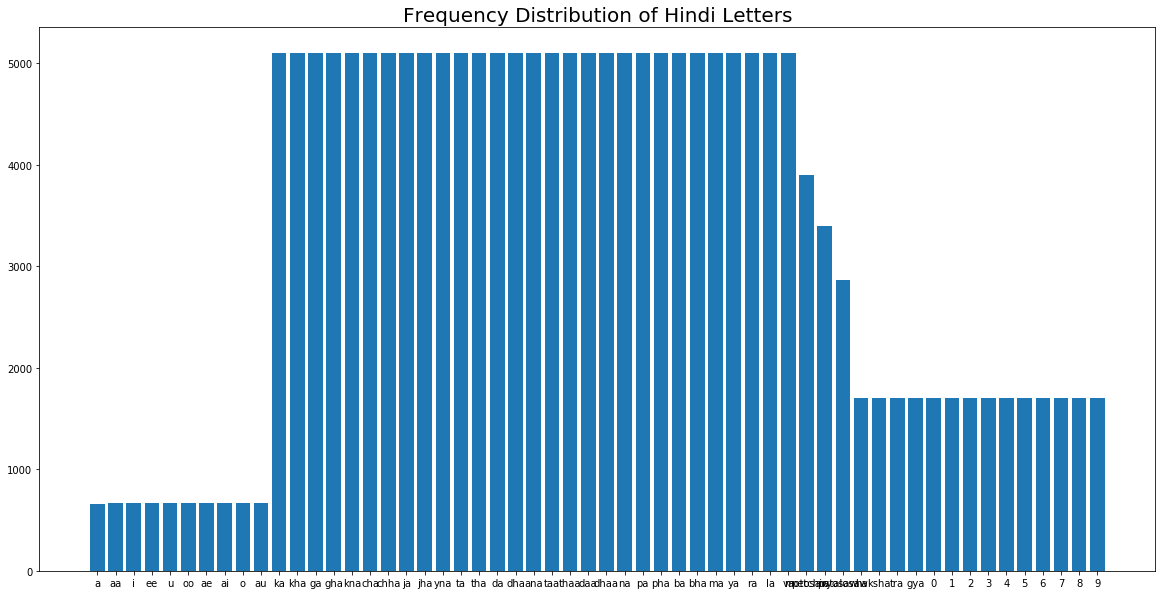

Labels:
 [46 46 46 ... 45 45 45]
Shape of Labels: (188492,)


In [11]:
labels=convert(labels)

# SHUFFLING AND GENERATING DATASET

In [12]:
def randomize(data,labels):
    idx = np.arange(0,len(data))
    np.random.shuffle(idx)
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [13]:
images = np.array(images)/255.0
labels = np.array(labels)

In [14]:
learning_rate = 0.0005
epochs = 50
batch_size = 200
display_step = 100

In [15]:
n_input = 784
n_classes = 56
dropout = 0.5

# Splitting the dataset into Training and Holdout(Test set)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15, random_state = 101)
print('x train shape', x_train.shape)
print('y train shape', y_train.shape)
print('y test shape', x_test.shape)
print('y test shape', y_test.shape)

x train shape (160218, 784, 1)
y train shape (160218,)
y test shape (28274, 784, 1)
y test shape (28274,)


# CALLING KERAS AND TRAINING THE MODEL

In [17]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm

In [18]:
from keras.preprocessing.image import ImageDataGenerator
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = x_train.astype('float32')
test_images = x_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 56)
test_labels = np_utils.to_categorical(y_test, 56)

train_datagen.fit(x_train.reshape(1,160218,784,1)) #68347
test_datagen.fit(x_test.reshape(1,28274, 784, 1)) #12062

K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Convolution2D(32,(5,5), input_shape=(28,28,1),
                             activation='relu',padding='same',
                            kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(32, (5,5),activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
#model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(56, activation='softmax'))

#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#opt = optimizers.Adadelta()
opt = optimizers.Adamax(lr=0.0005, beta_1=0.75, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              820224    
__________

# CHECKING ACCURACY OF OUR MODEL

In [34]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 99.51%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


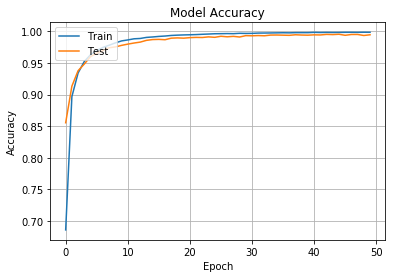

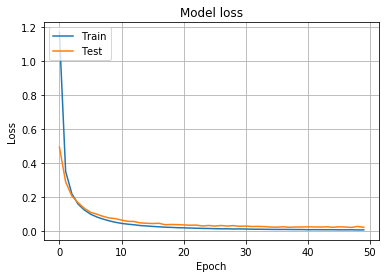

In [35]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# SAVING AND EXPORTING MODEL

In [36]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("model.h5")
# Creates a HDF5 file 'model.h5'

# TESTING ON AN IMAGE

prediction: oo


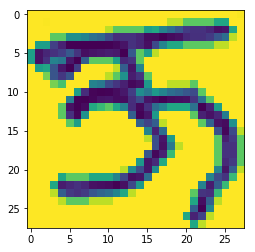

In [37]:
hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','ta','tha','da','dha','ana','taa','thaa','daa','dhaa','na','pa','pha','ba','dha','ma','ya','ra','la','va','motosaw','petchiryosaw','patalosaw','ha','ksha','tra','gya','0','1','2','3','4','5','6','7','8','9','a','aa','i','ee','u','oo','ae','ai','o','au','an','ah']
m = cv2.imread('example.png',0)
plt.imshow(m)
plt.show
print('prediction: '+str(hindi_letters[int(model.predict_classes(m.reshape(1,784)))]))

# LOADING TEST DATASET

In [38]:
def shuffle(df, n=1, axis=0):
        df = df.copy()
        for _ in range(n):
            df.apply(np.random.shuffle, axis=axis)
        return df
test=pd.read_csv('test.csv')
test = test.drop('0',axis=1)
#test = shuffle(test)

In [39]:
test_images = test.iloc[:,1:].values
print("Number of images:", test_images.shape[0])
print("Number of pixels in each image:", test_images.shape[1])

test_images = test_images.reshape(test_images.shape[0], 784,1)

Number of images: 13799
Number of pixels in each image: 784


In [40]:
labels = test.iloc[:,:1].values.flatten()

In [41]:
hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','ta','tha','da','dha','ana','taa','thaa','daa','dhaa','na','pa','pha','ba','dha','ma','ya','ra','la','va','motosaw','petchiryosaw','patalosaw','ha','ksha','tra','gya','0','1','2','3','4','5','6','7','8','9','a','aa','i','ee','u','oo','ae','ai','o','au','an','ah']
correct=0
for i in range(0,labels.size):
    ans=hindi_letters[int(model.predict_classes(test_images[i].reshape(1,784)))]
    if str(labels[i])==ans:
        correct+=1
print("Test Accuracy on given test dataset is: ",(correct/labels.size)*100)

Test Accuracy on given test dataset is:  92.85455467787521


# TESTING ON ANOTHER TEST DATASET

In [43]:
import os

def load_images_from_folder(folder,letter,accuracy,ctr):
    images = []
    for filename in os.listdir(folder):
        ctr+=1
        final=[]
        img = cv2.imread(os.path.join(folder,filename),0)
        ans = hindi_letters[int(model.predict_classes(img.reshape(1,784)))]
        if (ans==letter):
            accuracy+=1
        if img is not None:
            images.append(img)
    return accuracy,ctr

hindi_letters=hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','ta','tha','da','dha','ana','taa','thaa','daa','dhaa','na','pa','pha','ba','bha','ma','ya','ra','la','va','motosaw','petchiryosaw','patalosaw','ha','ksha','tra','gya','0','1','2','3','4','5','6','7','8','9']
file_path='nhcd/consonants/'
accuracy,ctr=0,0
for i in range(36):
    accuracy,ctr=load_images_from_folder(file_path+str(i+1),hindi_letters[i],accuracy,ctr)
file_path='nhcd/numerals/'
for i in range(10):
    accuracy,ctr=load_images_from_folder(file_path+str(i),hindi_letters[36+i],accuracy,ctr)
    
print("Accuracy for this dataset of size",ctr,"is:",(accuracy/ctr)*100)

IndexError: list index out of range

In [44]:
import keras

In [45]:
import tensorflow